In [42]:
%matplotlib inline

import math
from matplotlib import pyplot as plt
import numpy as np

In [108]:
def math_func(x):
    return math.sin(x/5) * math.exp(x/10) + 5 * math.exp(-1*x/2)

def map_to_array(func, sequence):
    return np.array(list(map(func, sequence)))

In [109]:
x = np.arange(1, 16, 1)
y = map_to_array(math_func, x)

In [57]:
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([3.25221687, 2.31503384, 1.87783842, 1.74684595, 1.7977761 ,
        1.94722128, 2.13543898, 2.31617016, 2.45082365, 2.50541641,
        2.44929128, 2.2550105 , 1.89904466, 1.36300335, 0.63522142]))

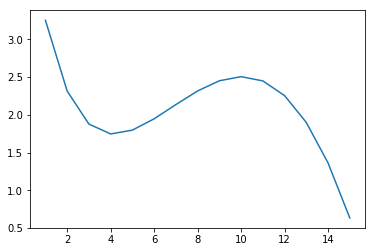

In [49]:
plt.plot(x, y)
plt.draw()

In [115]:
x = np.array([1, 4, 10, 15])
y = map_to_array(math_func, x)

In [50]:
from functools import partial

In [111]:
# создадим матрицу в которой каждый x предствавим многочленом в степени 0, 1, 2, 3
# нулевая степень нужна для использования базица
def get_list_polynomial(x, to_degree=4):
    """
    Получение списка числа возведенного в степени до to_degree=4
    """
    get_number_pow = partial(pow, x)
    return map_to_array(get_number_pow, range(to_degree))
    
X = map_to_array(get_list_polynomial, x)

In [112]:
X[:3], X.shape

(array([[   1,    1,    1,    1],
        [   1,    4,   16,   64],
        [   1,   10,  100, 1000]]), (4, 4))

In [87]:
y = y.reshape(len(y), 1)

In [88]:
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

In [103]:
w

array([[ 4.36264154],
       [-1.29552587],
       [ 0.19333685],
       [-0.00823565]])

In [106]:
print(np.dot(X, w).T, '\n', y.T)

[[3.25221687 1.74684595 2.50541641 0.63522142]] 
 [[3.25221687 1.74684595 2.50541641 0.63522142]]


In [101]:
answer = ' '.join(map(lambda _w: str(round(_w, 2)), w.T[0]))
answer

'4.36 -1.3 0.19 -0.01'

In [117]:
with open('submission-2.txt', 'w', encoding='utf-8') as f:
    f.write(answer)

### Еще один способ сделать y

In [114]:
x = x

[1, 4, 10, 15]

In [116]:
# math.sin(x/5) * math.exp(x/10) + 5 * math.exp(-1*x/2)
_y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-1 * x / 2)
print(_y, '\n', y.T)

[3.25221687 1.74684595 2.50541641 0.63522142] 
 [3.25221687 1.74684595 2.50541641 0.63522142]
